In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams 

rcParams['figure.figsize'] = 12, 7
sns.set()

In [2]:
df = pd.read_excel('Superstore.xlsx')

### Questions
- Generated most profit, sales (top and worst 5)
    - ship mode
    - segment
    - city
    - state
    - region 
    - category
    - sub category
- Profit to sales ratio based on categorical variables
- Quantity to profit ratio
- Distribution of sales, quantity, discount, and profit
- Correlation between sales, quantity, discount, and profit

In [5]:
df.columns = map(lambda x: x.lower().replace(' ', '_').replace('-', '_'), df.columns)
df.head()

,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ship_mode     9994 non-null   object 
 1   segment       9994 non-null   object 
 2   country       9994 non-null   object 
 3   city          9994 non-null   object 
 4   state         9994 non-null   object 
 5   postal_code   9994 non-null   int64  
 6   region        9994 non-null   object 
 7   category      9994 non-null   object 
 8   sub_category  9994 non-null   object 
 9   sales         9994 non-null   float64
 10  quantity      9994 non-null   int64  
 11  discount      9994 non-null   float64
 12  profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isnull().sum()

ship_mode       0
segment         0
country         0
city            0
state           0
postal_code     0
region          0
category        0
sub_category    0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

In [9]:
df.describe()

,postal_code,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
q_df = df[['sales', 'quantity', 'discount', 'profit']]
q_df.head()

,sales,quantity,discount,profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [11]:
df.columns

Index(['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub_category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

### Graph Functions

In [183]:
def pie(df, col, *args, **kwargs):
    data = df[col].value_counts()
    return data.plot.pie(*args, **kwargs)


def thousand_sep(n, d=2):
    pattern = '{:0.' + f'{d}f' + '}'
    num = float(pattern.format(n))
    return '{:,}'.format(num)


def plot_against(against, col, estimator=np.mean, th_sep=False):
    ax = sns.barplot(x=df[col], y=df[against], palette='rainbow', ci=None, estimator=estimator)
    xlabel = col.replace('_', ' ').title()
    ylabel = against.replace('_', ' ').title()
    ax.set(ylabel=ylabel, xlabel=xlabel)
    
    for nr, p in enumerate(ax.patches):
        value = p.get_height()
        height = value + ax.get_ylim()[1] / 50
        ax.text(
            nr, 
            height, 
            thousand_sep(value) if th_sep else '{:0.2f}'.format(value), 
            color='black', 
            fontsize=15, 
            ha='center', 
            va='center'
        )
    return ax


def against_profit(*args, **kwargs):
    return plot_against('profit', *args, **kwargs)

def against_sales(*args, **kwargs):
    return plot_against('sales', *args, **kwargs)

def against_discount(*args, **kwargs):
    return plot_against('discount', *args, **kwargs)

<AxesSubplot:>

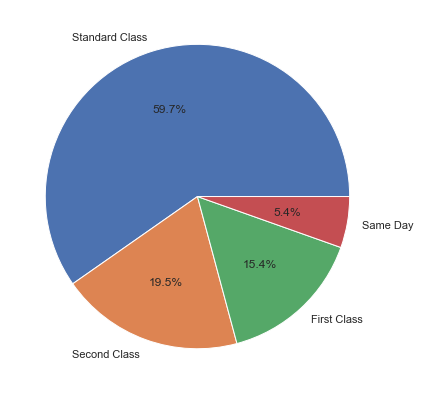

In [26]:
pie(df, 'ship_mode', autopct='%1.1f%%', ylabel='')

<AxesSubplot:>

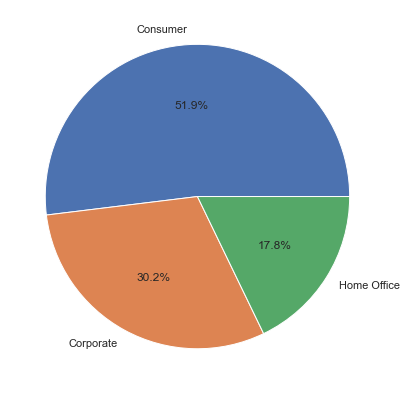

In [27]:
pie(df, 'segment', autopct='%1.1f%%', ylabel='')

<AxesSubplot:>

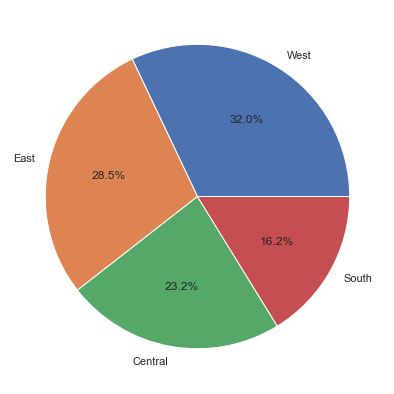

In [28]:
pie(df, 'region', autopct='%1.1f%%', ylabel='')

<AxesSubplot:>

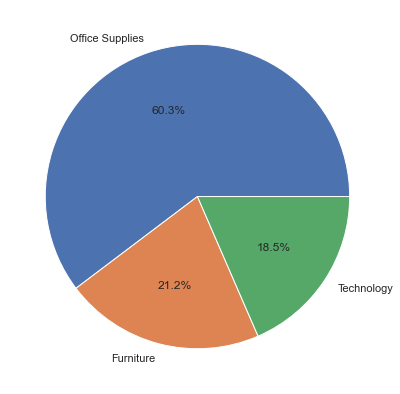

In [29]:
pie(df, 'category', autopct='%1.1f%%', ylabel='')

<AxesSubplot:>

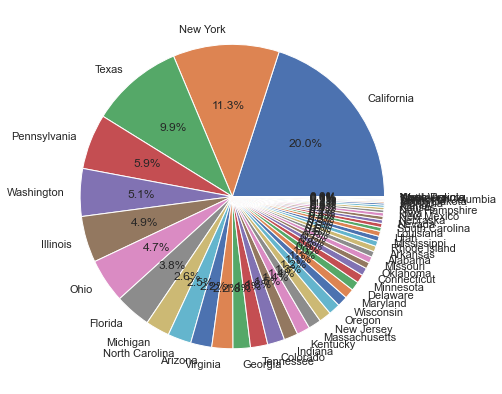

In [30]:
pie(df, 'state', autopct='%1.1f%%', ylabel='')

<AxesSubplot:>

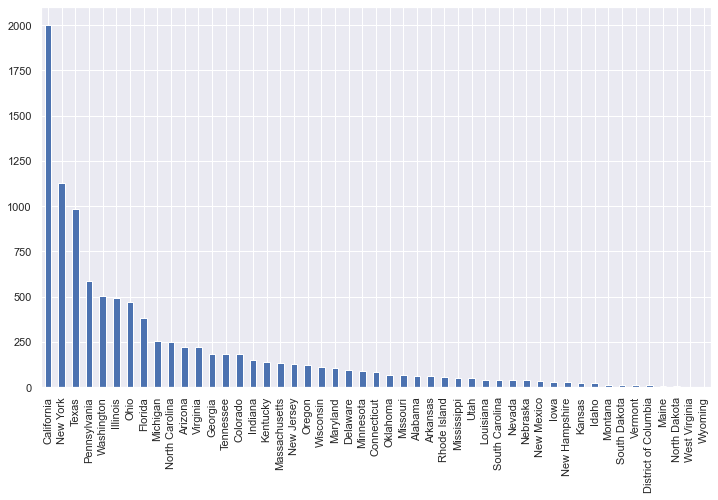

In [33]:
df.state.value_counts().plot.bar()

In [35]:
df.columns

Index(['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub_category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

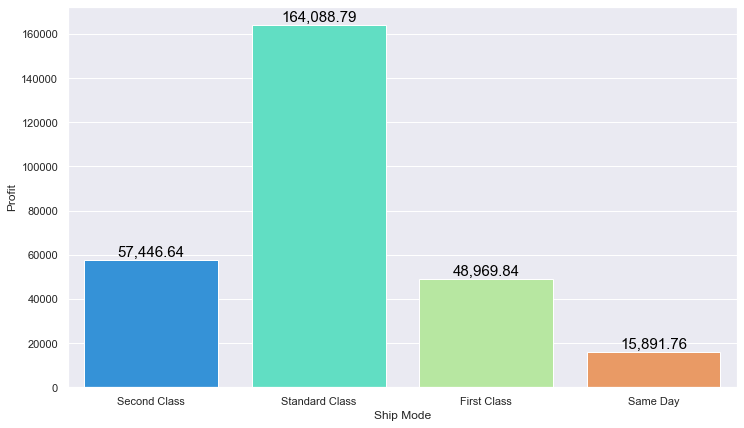

In [181]:
plot = against_profit('ship_mode', np.sum, True)

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

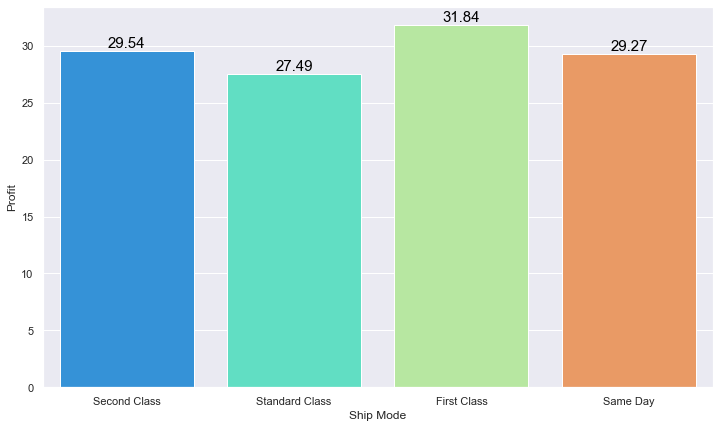

In [182]:
against_profit('ship_mode')

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

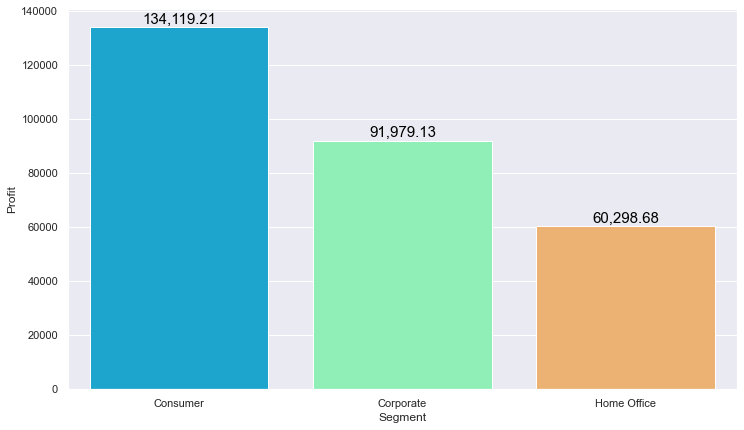

In [255]:
against_profit('segment', np.sum, True)

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

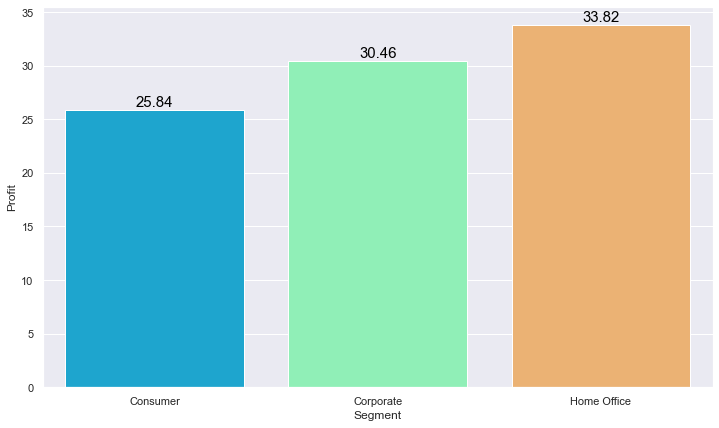

In [164]:
against_profit('segment')

<AxesSubplot:xlabel='Category', ylabel='Profit'>

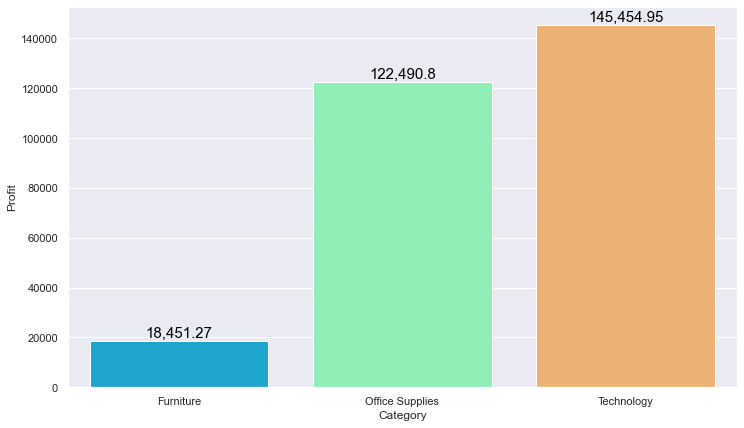

In [246]:
against_profit('category', np.sum, True)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

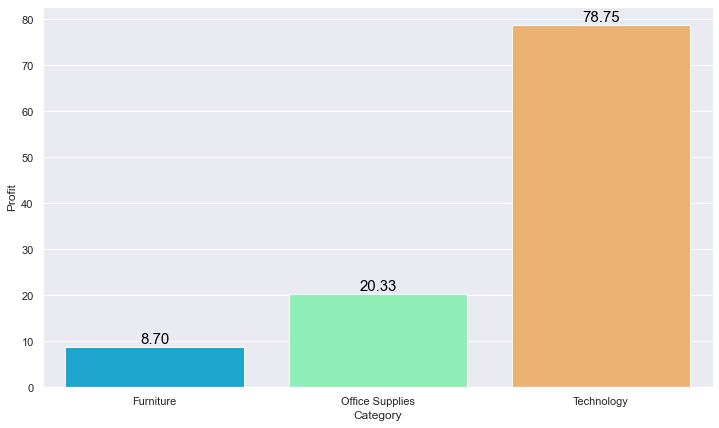

In [247]:
against_profit('category')

<AxesSubplot:xlabel='Region', ylabel='Profit'>

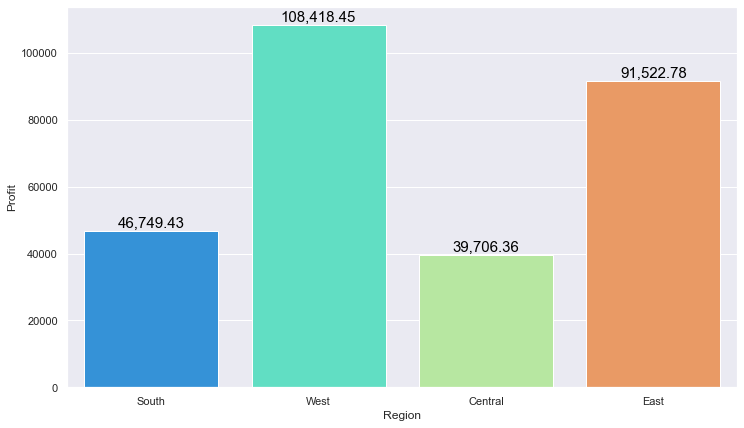

In [167]:
against_profit('region', np.sum, True)

<AxesSubplot:xlabel='Region', ylabel='Profit'>

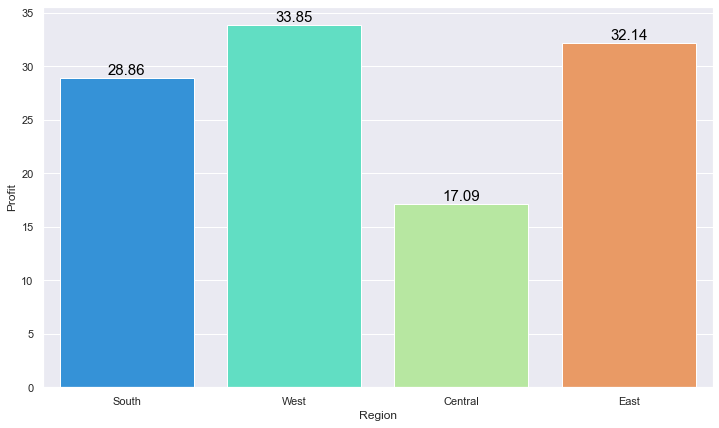

In [168]:
against_profit('region')

In [170]:
q_df.corr()

,sales,quantity,discount,profit
sales,1.000000,0.200795,-0.028190,0.479064
quantity,0.200795,1.000000,0.008623,0.066253
discount,-0.028190,0.008623,1.000000,-0.219487
profit,0.479064,0.066253,-0.219487,1.000000


Text(0.5, 1.0, 'CORRELATION HEATMAP')

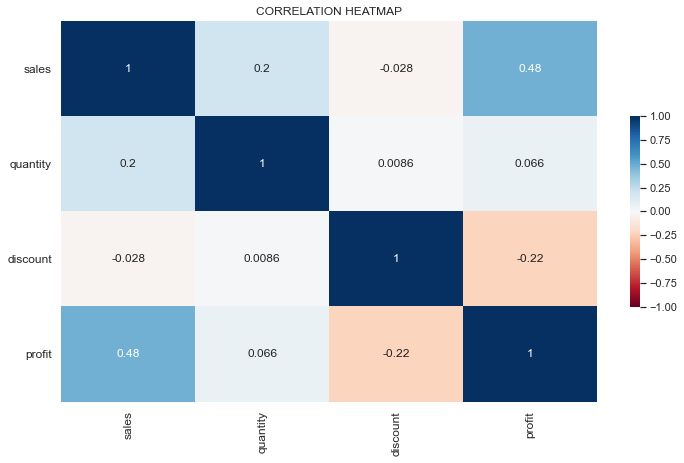

In [184]:
fig = sns.heatmap(q_df.corr(), annot=True, vmax=1, vmin=-1, cmap='RdBu', cbar_kws={"shrink": .5})
fig.set_xticklabels(fig.get_xticklabels(), rotation=90, fontsize=12)
fig.set_yticklabels(fig.get_yticklabels(), fontsize=12, rotation=0)
plt.title('CORRELATION HEATMAP')

<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

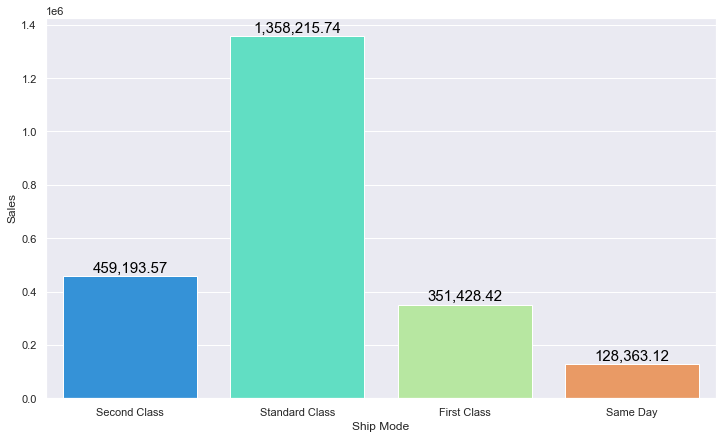

In [185]:
against_sales('ship_mode', np.sum, True)

<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

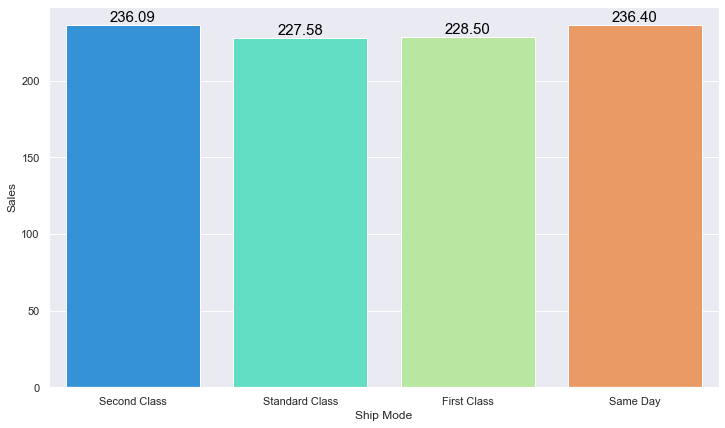

In [186]:
against_sales('ship_mode')

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

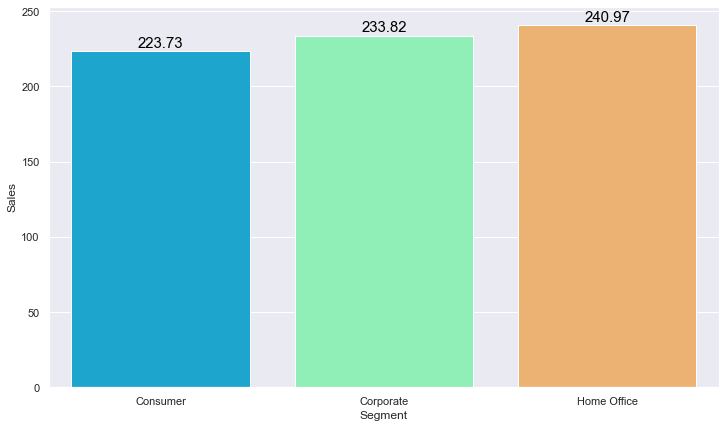

In [187]:
against_sales('segment')

<AxesSubplot:xlabel='Region', ylabel='Sales'>

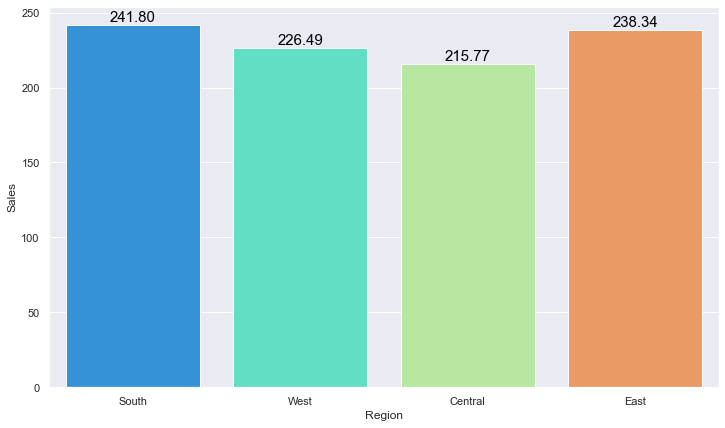

In [188]:
against_sales('region')

<AxesSubplot:xlabel='Category', ylabel='Sales'>

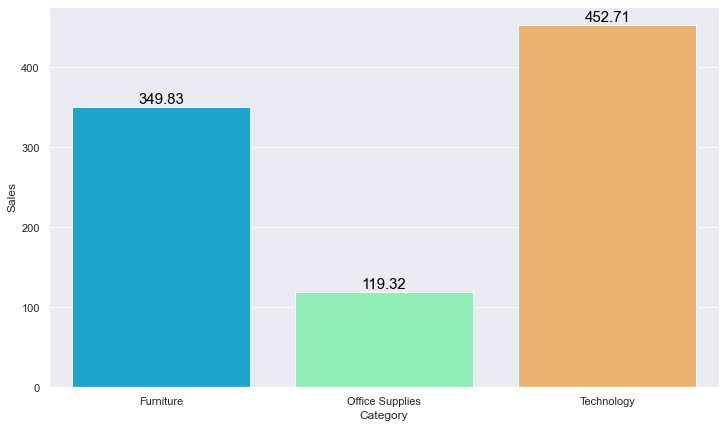

In [189]:
against_sales('category')

<AxesSubplot:xlabel='Ship Mode', ylabel='Discount'>

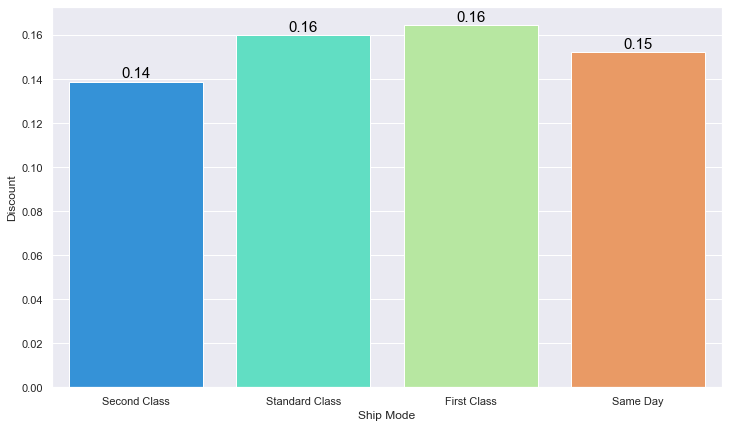

In [190]:
against_discount('ship_mode')

<AxesSubplot:xlabel='Segment', ylabel='Discount'>

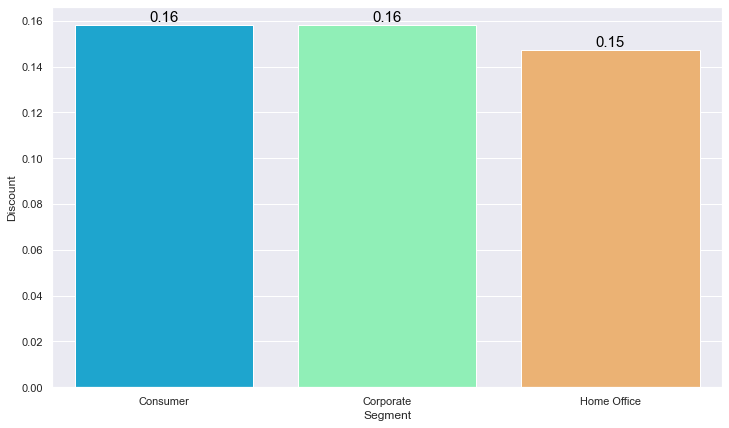

In [193]:
against_discount('segment')

<AxesSubplot:xlabel='Region', ylabel='Discount'>

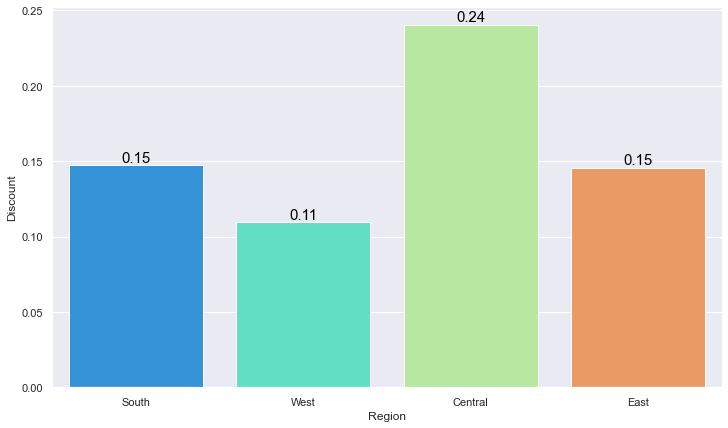

In [195]:
against_discount('region')

<AxesSubplot:xlabel='Category', ylabel='Discount'>

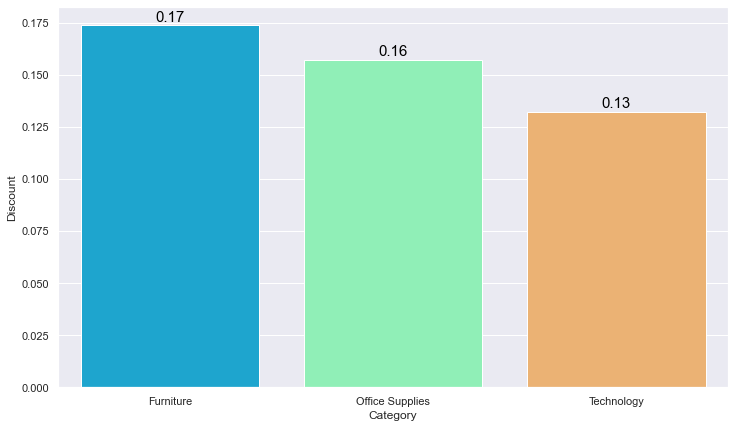

In [196]:
against_discount('category')

In [199]:
q_df.head()

,sales,quantity,discount,profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


<AxesSubplot:>

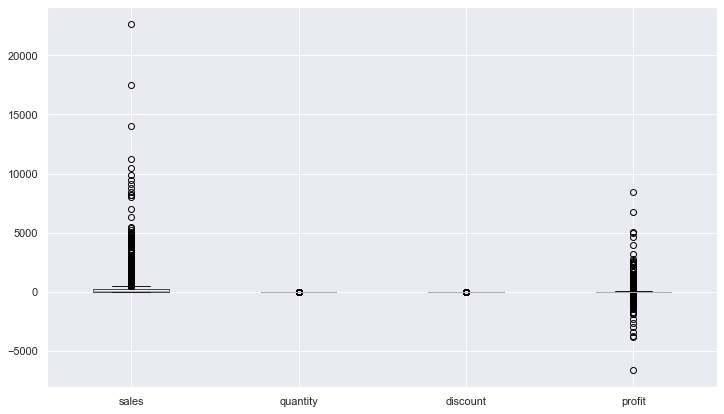

In [204]:
q_df.boxplot()

In [205]:
df.head()

,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [234]:
def profit_sales(col):
    group = df.groupby(col).sum()
    ratio = group['profit'] / group['sales']
    ratio = ratio.to_frame()
    ratio.rename(columns={0: 'profit / sales'}, inplace=True)
    ratio['profit / sales'] = ratio['profit / sales'].apply(lambda x: '{:0.2f}%'.format(x * 100))
    return ratio

In [240]:
def qty_profit(col):
    group = df.groupby(col).sum()
    ratio = group['quantity'] / group['profit']
    ratio = ratio.to_frame()
    ratio.rename(columns={0: 'qty / profit'}, inplace=True)
    ratio['qty / profit'] = ratio['qty / profit'].apply(lambda x: '{:0.2f}%'.format(x * 100))
    return ratio

In [236]:
profit_sales('ship_mode')

,profit / sales
ship_mode,
First Class,13.93%
Same Day,12.38%
Second Class,12.51%
Standard Class,12.08%


In [237]:
profit_sales('segment')

,profit / sales
segment,
Consumer,11.55%
Corporate,13.03%
Home Office,14.03%


In [238]:
profit_sales('region')

,profit / sales
region,
Central,7.92%
East,13.48%
South,11.93%
West,14.94%


In [239]:
profit_sales('category')

,profit / sales
category,
Furniture,2.49%
Office Supplies,17.04%
Technology,17.40%


In [242]:
qty_profit('ship_mode')

,qty / profit
ship_mode,
First Class,11.63%
Same Day,12.33%
Second Class,12.92%
Standard Class,13.89%


In [243]:
qty_profit('segment')

,qty / profit
segment,
Consumer,14.55%
Corporate,12.62%
Home Office,11.18%


In [244]:
qty_profit('region')

,qty / profit
region,
Central,22.11%
East,11.60%
South,13.28%
West,11.31%


In [245]:
qty_profit('category')

,qty / profit
category,
Furniture,43.51%
Office Supplies,18.70%
Technology,4.77%
